# Exercise_7.1.1

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import time

### Non-vectorized normal pdf function

In [22]:
# non-vectorized - loop over each sample in data set X
def normalpdf(X,mean,Sigma):
    d,nsample = X.shape
    Z = np.zeros((1,nsample))
    for i in range(nsample):
        Z[0,i] = np.exp(-0.5*np.matmul((X[:,[i]]-mean).T,np.matmul(np.linalg.inv(Sigma),X[:,[i]]-mean)))/np.sqrt(np.power(2*np.pi,d)*np.linalg.det(Sigma))
    return Z

### Vectorized normal pdf function

In [23]:
# vectorized
def normalpdf_vectorized(X,mean,Sigma):
    d = X.shape[0]
    Z = np.exp(-0.5*np.sum((X-mean)*np.matmul(np.linalg.inv(Sigma),X-mean),axis=0,keepdims=True))/np.sqrt(np.power(2*np.pi,d)*np.linalg.det(Sigma))
    return Z

### Comparison

Dimension: 100  Diff = non-vectorized-vectorized: 3.99507373889002e-18
Dimension: 500  Diff = non-vectorized-vectorized: 8.928801430035304e-18
Dimension: 1000  Diff = non-vectorized-vectorized: -1.1075055744328465e-17
Dimension: 2000  Diff = non-vectorized-vectorized: -1.589224656801997e-17
Dimension: 5000  Diff = non-vectorized-vectorized: -2.339937738721458e-17


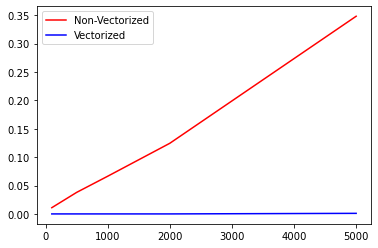

In [24]:
nfeature = 5
nsample = 5000
X = np.random.randn(nfeature,nsample)
list_time_vectorized = []
list_time_nonvectorized = []
list_ndim = [100,500,1000,2000,5000]
mean = np.random.randn(nfeature,1)
Covariance = np.diag(np.random.rand(5))
for ndim in list_ndim:
    time_start = time.time()
    Z1 = normalpdf(X[:,0:ndim],mean,Covariance)
    time_nonvectorized = time.time()
    list_time_nonvectorized.append(time_nonvectorized - time_start)
    time_start = time.time()
    Z2 = normalpdf_vectorized(X[:,0:ndim],mean,Covariance)
    list_time_vectorized.append(time.time() - time_start)
    error = np.sum(Z1-Z2)
    print("Dimension: {}  Diff = non-vectorized-vectorized: {}".format(ndim,error))

fig = plt.figure()
plt.plot(list_ndim,list_time_nonvectorized,"r-",label="Non-Vectorized")
plt.plot(list_ndim,list_time_vectorized,"b-",label="Vectorized")
plt.legend()